# Telecom Customer Churn

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.
your responsibility is to predict wheter the customer will churn or not

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

# 1. Data Extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include='object').transpose()

,count,unique,top,freq
customerID,7043,7043,2000-MPKCA,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[6728-DKUCO, 3315-TOTBP]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[72, 40]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[Yes, No]"
8,InternetService,object,0,0.0,3,"[No, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[No, No internet service]"


# 2. Data Cleaning

Our Data is Good, there is no missing Value, but we must know why the TotalCharges Column types is object, not numeric

When We Want to Convert the TotalCharges Column, it will error, and its because some datas in the TotalCharges column filled with empty strin

In [8]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 datas with empty string at TotalCharges Column

> #1. <font color='red'> <b>Extra Question</b> </font> ,  give me your opinion, Why this 11 datas filled with empty String?

Type Your Answer Here ...

I decide to Delete this Data And Convert it to Integer

In [9]:
df.drop(df[df['TotalCharges'] == ' '].index,inplace=True)

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Change SeniorCitizen Column to yes no

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes',0:'No'})

# 3. EDA

### 3.1 Check Our Target Distributions

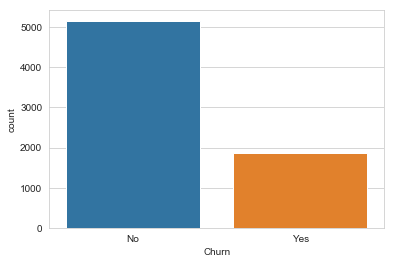

In [13]:
sns.countplot(df['Churn'])

### 3.2 Check correlation each columns with target

In [14]:
categorical_columns = df.select_dtypes(include='O').drop(['Churn','customerID'],axis=1).columns

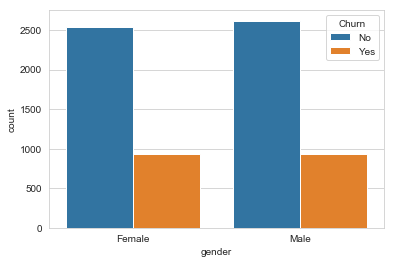

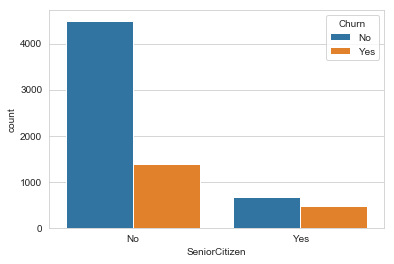

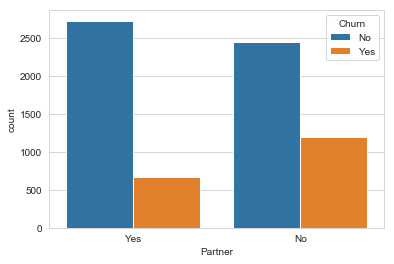

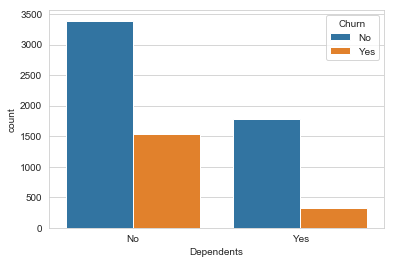

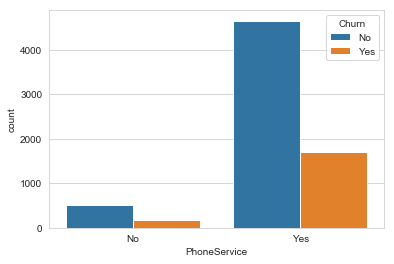

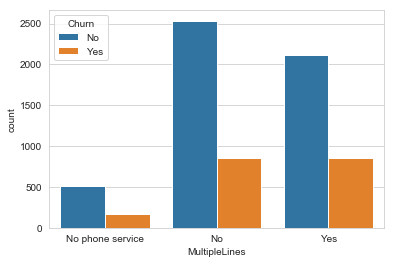

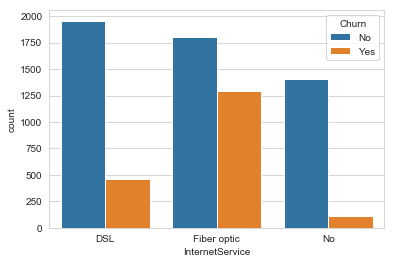

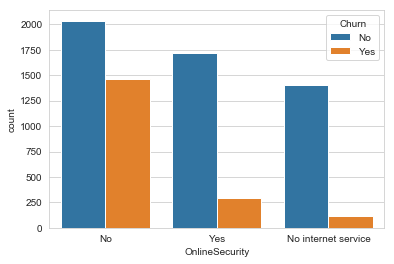

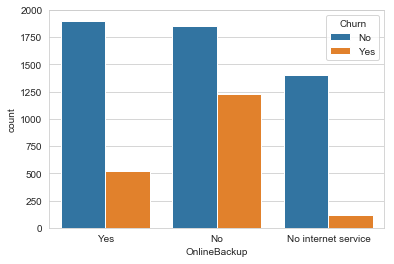

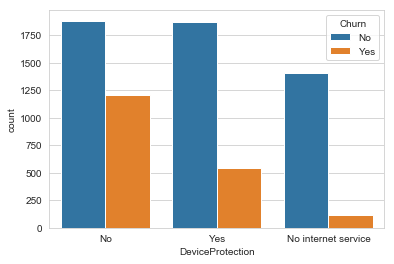

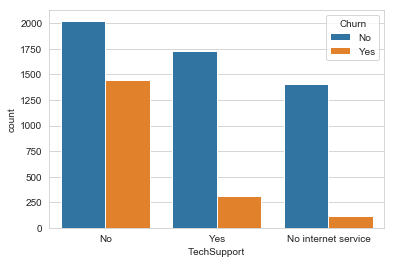

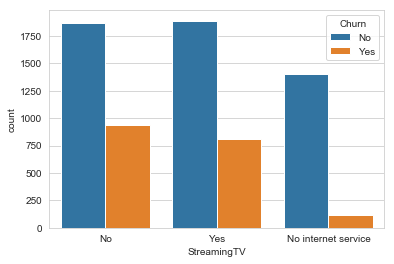

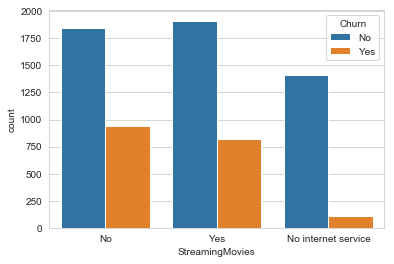

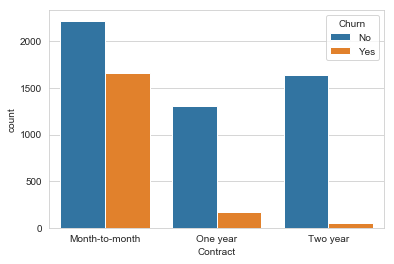

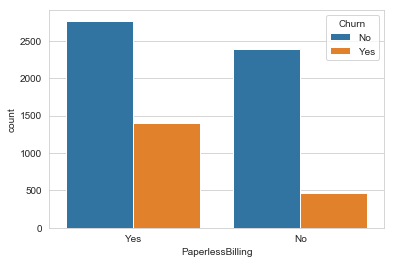

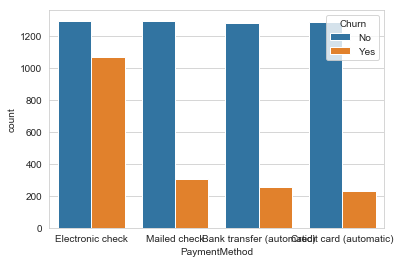

In [15]:
for item in categorical_columns:
    sns.countplot(data=df, x=item , hue='Churn')
    plt.show()

> #2. <font color='red'> <b>Extra Question</b> </font> ,  What Information You get from the plots above?

Type Your Answer Here ...

In [16]:
numeric_columns = df.select_dtypes(exclude='O').columns

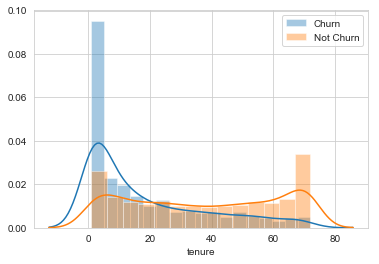

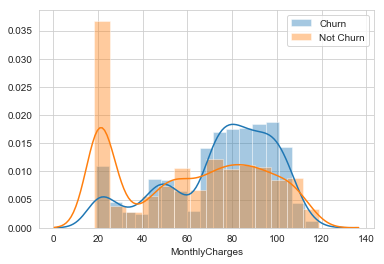

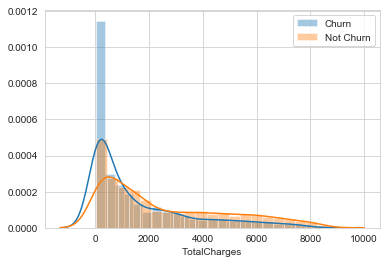

In [17]:
for item in numeric_columns:
    fig,ax = plt.subplots(nrows=1,ncols=1)
    sns.distplot(df[df['Churn'] == 'Yes'][item] , ax=ax, label='Churn')
    sns.distplot(df[df['Churn'] == 'No'][item] , ax=ax, label='Not Churn')
    plt.legend()
    plt.show()

# 4. Feature Engineering

### 4.1 Do One hot Encoder for Categorical Column Except Our Target, use pd.get_dummies() , and use drop_frirst = True

In [18]:
df.drop('customerID',axis=1,inplace=True)

In [19]:
x = pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)

In [20]:
y = df['Churn'].map({'Yes' : 1,'No' : 0})

In [21]:
print('Our Features from {} columns Becomes {} columns'.format(len(df.drop('Churn',axis=1).columns),len(x.columns)))

Our Features from 19 columns Becomes 30 columns


# 5. Modelling

### 5.1 First Modelling Using Logistic Regression

- Do Train Test Split First, using random_state=101, test size =0.2
- Train Model
- Print Classification Report For Test Data
- Print Classification Report For Train Data

> #3. <font color='red'> <b>Extra Question</b> </font>, Before We Do Modelling, Which metric will you optimize for this Case??
1. Recall Churn
2. Recall No Churn
3. Precision Churn
4. Precision No Churn <br>

> Choose One Of these Metrics And Give me the reason why you choose it !

Type Your Answer Here ...

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.2)

In [24]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
test_prediction = log_model.predict(X_test)
train_prediction = log_model.predict(X_train)

In [25]:
print('=============== TEST DATA REPORT ======================')
print(classification_report(y_test,test_prediction))

=============== TEST DATA REPORT ======================
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1052
           1       0.65      0.55      0.59       355

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.81      1407



In [26]:
print('=============== TRAIN DATA REPORT ======================')
print(classification_report(y_train,train_prediction))

=============== TRAIN DATA REPORT ======================
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4111
           1       0.66      0.56      0.60      1514

   micro avg       0.80      0.80      0.80      5625
   macro avg       0.75      0.73      0.74      5625
weighted avg       0.80      0.80      0.80      5625



> #4. <font color='red'> <b>Extra Question</b> </font>, What Information You get from these two Classification Reports??

Type Your Answer Here ...

### 5.2 Find the Best Algorithm For this Data

- Use cros_val_score for get the algorithm's score (cv=5)
- Use Logistic Regression , Decision Tree , Random Forest, Gradient Boosting, SVC , KNN
- Use Default Parameter For All Model
- Print The Score Like The Plots Below

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [28]:
models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,SVC,KNeighborsClassifier]
models_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','SVC','KNeighborsClassifier']

In [29]:
data_score = []
for model,name in zip(models,models_name):
    score = cross_val_score(model(),x,y,cv=5)
    data_score.append([name,score.mean()])

In [30]:
df_score_cv = pd.DataFrame(data_score,columns=['Name','Score'])

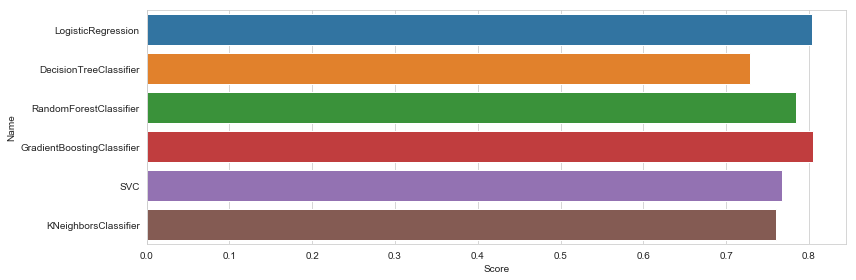

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_score_cv,y='Name',x='Score')
plt.tight_layout()

### 5.3 Find the Best Algorithm For this Data and Do Over Sampling With SMOTE at Training Data

- Use train_test_split(random_state=101,test_size=0.2)
- Do SMOTE for training Data (random_state=101)
- Use Logistic Regression , Decision Tree , Random Forest, Gradient Boosting, SVC , KNN
- Use Default Parameter For All Model
- Print The Accuracy Score And F1 Score Like The Plots Below (the plot might be different )

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score

In [33]:
score_smote = []
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size = 0.2)
smote = SMOTE(random_state=101)
X_smote,y_smote = smote.fit_sample(X_train,y_train)
for name,model in zip(models_name,models):
    algo = model()
    algo.fit(X_smote,y_smote)
    prediction = algo.predict(X_test)
    f1 = f1_score(y_test,prediction)
    acc = accuracy_score(y_test,prediction)
    score_smote.append([name,acc,f1])
    

In [34]:
df_acc_f1 = pd.DataFrame(score_smote,columns=['Name','Accuracy','F1 Score'])

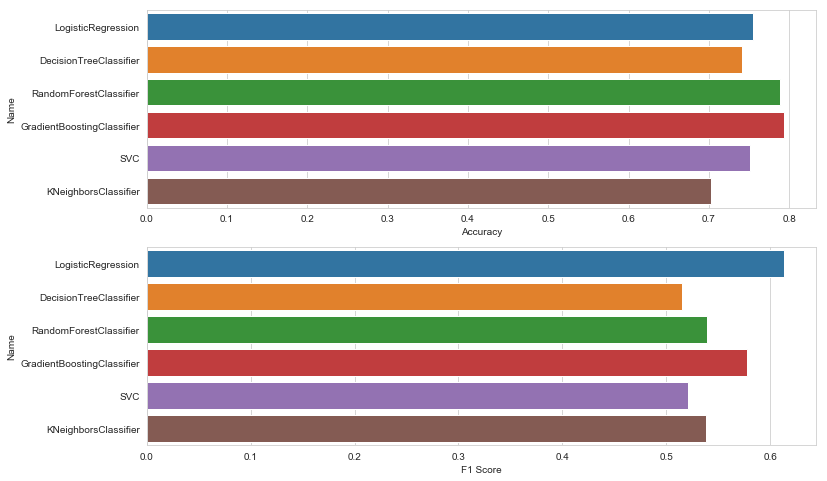

In [35]:
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(12,8))
sns.barplot(data=df_acc_f1 , x='Accuracy',y='Name',ax=ax[0])
sns.barplot(data=df_acc_f1 , x='F1 Score',y='Name',ax=ax[1])

### 5.4 KNN In Action 

- Do Standard Scaler For tenure, MonthlyCharges, TotalCharges
- Do One Hot Encoder For Categorical Data
- Use cros_val_score (cv=5)
- Find The Best K for KNN, use accuracy score to decide the best K
- Print like the Plots Below

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
scaler = StandardScaler()
df = df.reset_index(drop=True)
x_num_scaled = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
x_num_scaled_df = pd.DataFrame(x_num_scaled,columns=['tenure','MonthlyCharges','TotalCharges'])
x_to_concat = df.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
df_scaled = pd.concat([x_num_scaled_df ,x_to_concat.reset_index(drop=True)],axis=1)

In [38]:
df_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.280248,-1.161694,-0.994194,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0.064303,-0.260878,-0.173740,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-1.239504,-0.363923,-0.959649,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0.512486,-0.747850,-0.195248,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,-1.239504,0.196178,-0.940457,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [39]:
x_scaled = pd.get_dummies(df_scaled.drop('Churn',axis=1),drop_first=True)
y_scaled = df_scaled['Churn']
x_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.064303,-0.260878,-0.173740,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.512486,-0.747850,-0.195248,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [40]:
k_score = []
for i in range(1,41):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=i), x_scaled,y_scaled,cv=5)
    k_score.append([i,score.mean()])

In [41]:
df_k_score= pd.DataFrame(k_score)

Text(0.5,1,'Accuracy Score For Each K')

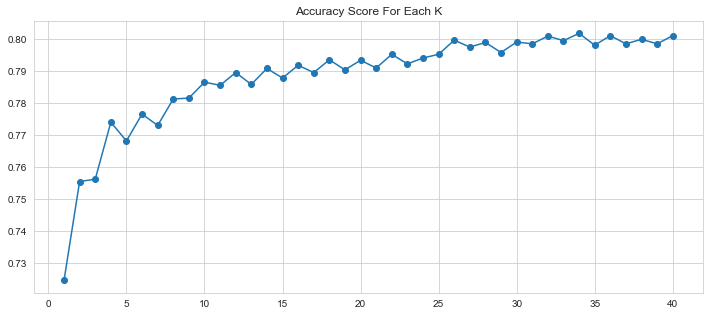

In [43]:
plt.figure(figsize=(12,5))
plt.plot(df_k_score[0],df_k_score[1],marker='o')
plt.title('Accuracy Score For Each K')

### 5.5 Logistic Regression With PCA

- do PCA for scaled features at number 5.4
- find best n_components for PCA , use cros_val_score(cv=5) , use accuracy score to decide the best n_components
- Print The Result Like the Plots Below

In [60]:
scores = []
for item in range(1,21):
    pca = PCA(n_components=item)
    x_pca = pca.fit_transform(x_scaled)
    x_pca_df = pd.DataFrame(x_pca,columns=['PC ' + str(i) for i in range(1,item+1)])
    cv_score = cross_val_score(LogisticRegression(),x_pca_df,y_scaled,cv=5)
    scores.append(cv_score.mean())

In [62]:
data_pca_score = pd.DataFrame(scores)

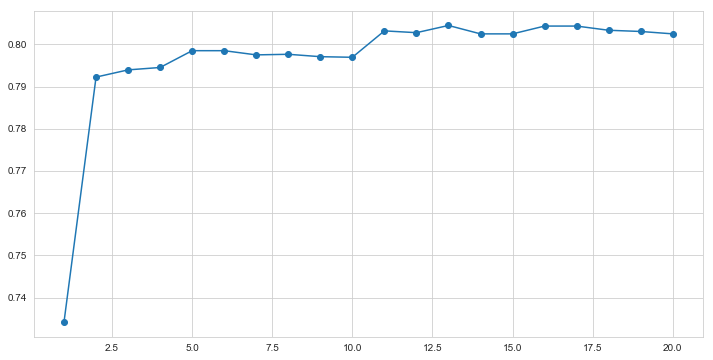

In [65]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21),data_pca_score[0],marker='o')

In [68]:
print('PCA 11 Is the Best For Accuracy Score')

PCA 11 Is the Best For Accuracy Score


### 5.5 Random Forest In Action

- Use Regular Features (Feature Without PCA or Standard Scaler)
- Find The Hyperparameter for min_sample_leafes and class_weight for Recall Score, use cv=3, n_estimator = 100, random_state = 101
- Print The Best Parameter
- Do Modelling With Best Parameter , use train_test_split (test_size=0.2,random_state=101)
- Print Classification Report
- Print Feature Importance


In [73]:
parameter = {'class_weight' : [{0 : 1 , 1:2},{0:1,1:4},{0:1,1:10}],'min_samples_leaf' : [5,10,20]}

In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=100,random_state=101),parameter,scoring='recall',cv=3)

In [77]:
grid.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 10}], 'min_samples_leaf': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [81]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [82]:
grid.best_params_

{'class_weight': {0: 1, 1: 10}, 'min_samples_leaf': 20}

In [84]:
rfc = RandomForestClassifier(n_estimators=100,random_state=101,class_weight={0: 1, 1: 10},min_samples_leaf=20)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=101, verbose=0, warm_start=False)

In [85]:
prediction = rfc.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68      1052
           1       0.40      0.92      0.56       355

   micro avg       0.63      0.63      0.63      1407
   macro avg       0.68      0.73      0.62      1407
weighted avg       0.81      0.63      0.65      1407



> #5. <font color='red'> <b>Extra Question</b> </font>, Why Our Recall For class 1 so hight, but the precision was very low, Why This Happe??

In [92]:
feat_importance = pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)

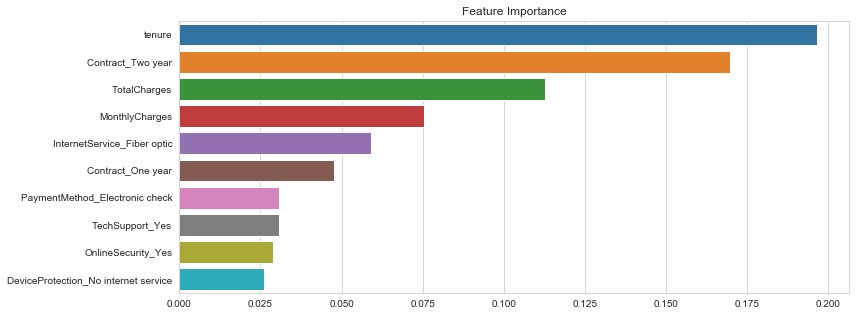

In [95]:
plt.figure(figsize=(12,5))
plt.title('Feature Importance')
sns.barplot(x=feat_importance.values,y=feat_importance.index)